In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics

In [156]:
df = pd.read_csv('data_flats.csv', sep = ';')
df.head()

,id,full_sq,life_sq,floor,preschool_education_centers_raion,school_education_centers_raion,school_education_centers_top_20_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,...,shopping_centers_raion,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,mkad_km,bulvar_ring_km,kremlin_km,price_doc
0,1,43,27.0,4.0,5,5,0,0,7,3,...,16,1.131260,0.145700,0.177975,2.158587,0.600973,1.422391,13.675657,15.156211,5850000
1,2,34,19.0,3.0,5,8,0,0,6,1,...,3,0.635053,0.147754,0.273345,0.550690,0.065321,9.503405,8.132640,8.698054,6000000
2,3,43,29.0,2.0,4,7,0,0,5,1,...,0,1.445960,0.049102,0.158072,0.374848,0.453172,5.604800,8.054252,9.067885,5700000
3,4,89,50.0,9.0,9,10,0,0,17,6,...,11,0.963802,0.179441,0.236455,0.078090,0.106125,2.677824,18.309433,19.487005,13100000
4,5,77,77.0,4.0,7,9,0,2,25,2,...,10,0.688859,0.247901,0.376838,0.258289,0.236214,11.616653,0.787593,2.578671,16331452


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 21 columns):
id                                       30469 non-null int64
full_sq                                  30469 non-null int64
life_sq                                  24086 non-null float64
floor                                    30302 non-null float64
preschool_education_centers_raion        30469 non-null int64
school_education_centers_raion           30469 non-null int64
school_education_centers_top_20_raion    30469 non-null int64
university_top_20_raion                  30469 non-null int64
sport_objects_raion                      30469 non-null int64
additional_education_raion               30469 non-null int64
culture_objects_top_25_raion             30469 non-null int64
shopping_centers_raion                   30469 non-null int64
metro_km_walk                            30444 non-null float64
kindergarten_km                          30469 non-null float64
school_km      

Что мы можем увидеть по нему? Что у нас есть 20 признаков. Один из них — id, не несет смысловой нагрузки. А один из признаков — наша независимая переменная, которую мы и будем предсказывать. Это цена квартиры (price_doc).

Мы точно можем видеть, что у нас есть пропуски, так как количество наблюдений разное у разных переменных и отличается для некоторых признаков от количества объектов.

Также количество пропусков для каждого признака можно посмотреть следующим образом:

In [158]:
df.isnull().sum()

id                                          0
full_sq                                     0
life_sq                                  6383
floor                                     167
preschool_education_centers_raion           0
school_education_centers_raion              0
school_education_centers_top_20_raion       0
university_top_20_raion                     0
sport_objects_raion                         0
additional_education_raion                  0
culture_objects_top_25_raion                0
shopping_centers_raion                      0
metro_km_walk                              25
kindergarten_km                             0
school_km                                   0
park_km                                     0
green_zone_km                               0
mkad_km                                     0
bulvar_ring_km                              0
kremlin_km                                  0
price_doc                                   0
dtype: int64

Или можно оценить визульно количество пропусков и их распределение:

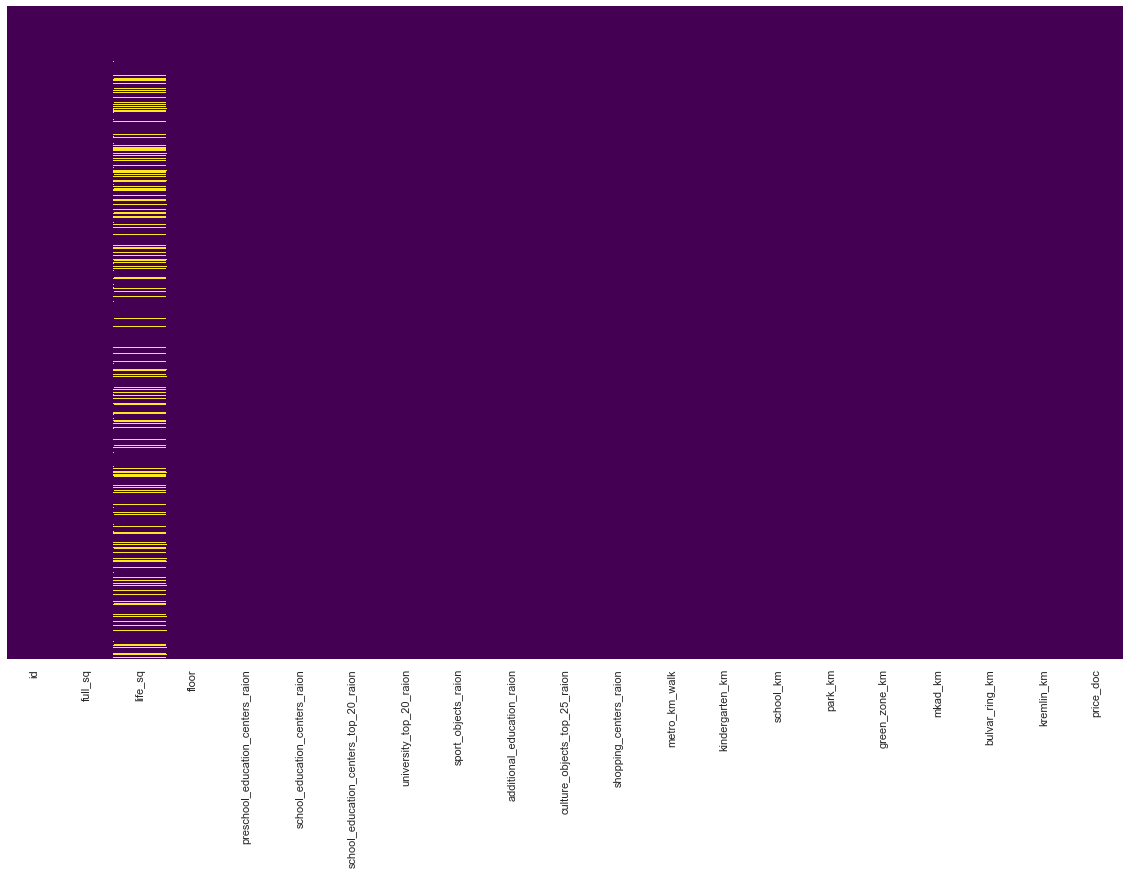

In [159]:
fig,ax = plt.subplots(figsize = (20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Здесь фиолетовым показаны заполненные ячейки, а желтым — пропущенные значения. Благодаря этому мы можем сразу оценить количество пропусков и посмотреть, в каких переменных они встречаются. Если пропуски встречаются в большом количестве только в нескольких переменных, которые не являются для нас важными, можно их удалить.

У нас пропуски по сути есть только в одном признаке — жилой площади. Просто не будем брать её в модель.

Далее всегда есть смысл посмотреть на распределение нашей целевой переменной и понять, какие значения мы будем предсказывать:

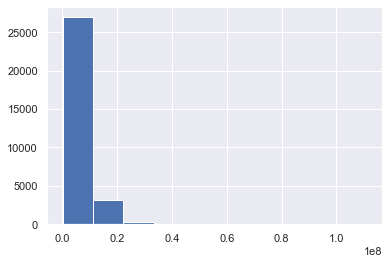

In [160]:
df.price_doc.hist()

У нашего распределения есть проблема — слишком сильный перепад. Много квартир в среднем сегменте, но очень мало дорогих квартир. На практике часто в таких случаях логорифмируют переменную, чтобы уменьшить перепады и сгладить хвост.

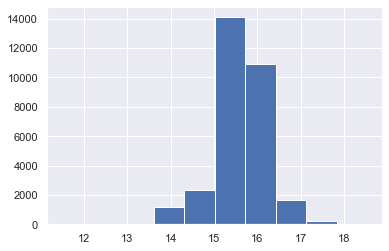

In [161]:
df['price_doc'] = df['price_doc'].apply(lambda w: np.log(w + 1))
df.price_doc.hist()

Отлично, выглядит уже лучше!

Теперь займемся отбором признаков.  Для начала нам надо проверить, нет ли мультиколлинеарности — сильной взаимосвязи между независимыми признаками. Для этого построим матрицу корреляций для признаков:

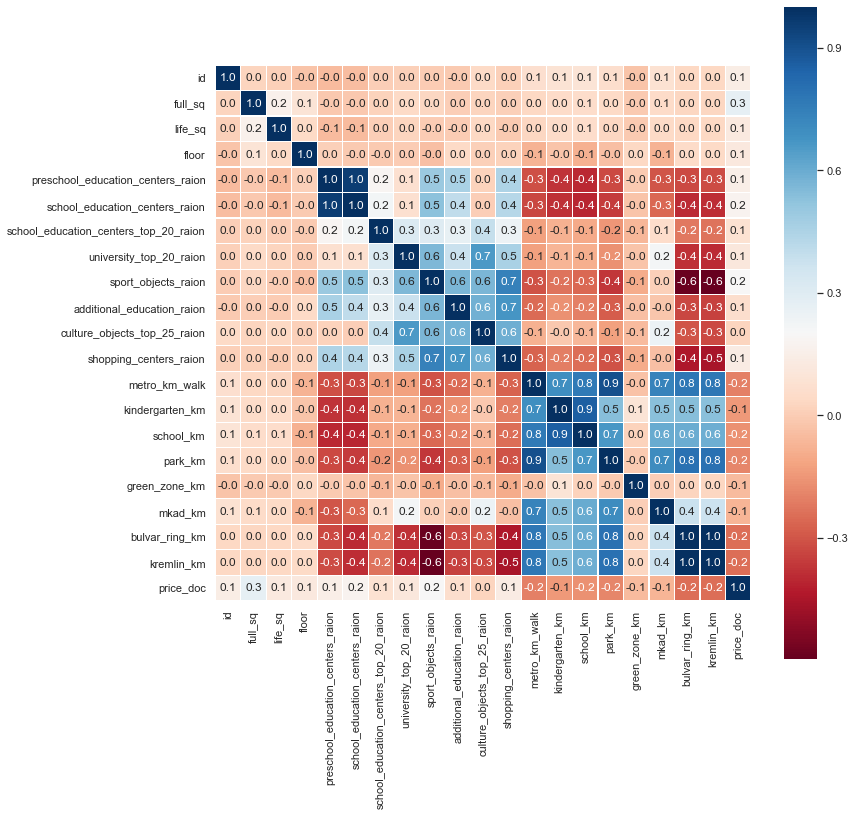

In [162]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

Смотрим, у каких пар признаков сильная взаимосвязь:

1. Количество школ и количество детских садов. Довольно логично, так как в Москве детские сады обычно присоединены к школам. Оставляем школы, т.к. у этого признака больше взаимосвязь с целевой переменной.
2. Расстояние до школ и расстояние до детских садов. По сути, это естественным образом вытекает из предыдущего пункта. Оставляем расстояние до школ.
3. Расстояние до парка и до метро. Рассуждая аналогично предыдущим парам, оставляем расстояние до метро.
4. Расстояние до Кремля и до бульварного кольца. У них коэффициент корреляции равен 1, и их корреляция с целевой переменной одинаковая. Поэтому можем убрать любой признак. Убираем расстояние до Кремля.

Удалите строки, где есть хотя бы один пропуск. Обучите линейную регрессию, взяв тестовую выборку размера 0.2, random_state=77.Нормализуйте отобранные признаки для тестовой и для обучающей выборки отдельно(!) с помощью функции RobustScaler() (функция, которая подобна известным вам методам нормализации, однако использует медианы и квантили для вычисления, поэтому не чувствительна к выбросам и может приводить к лучшим результатам). Вычислите MSE , ответ запишите с точностью до сотых. Не забудьте, что id не несет никакой содержательной информации, поэтому не надо брать его в качестве предиктора! Также не забудьте, что мы логарифмировали зависимую переменную, а значит при подсчете MSE необходимо найти экспоненциальную функцию от ! Округлите ответ до целых.

In [163]:
# df = df.dropna(axis = 0)
# df.info()

In [164]:
df.head()

,id,full_sq,life_sq,floor,preschool_education_centers_raion,school_education_centers_raion,school_education_centers_top_20_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,...,shopping_centers_raion,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,mkad_km,bulvar_ring_km,kremlin_km,price_doc
0,1,43,27.0,4.0,5,5,0,0,7,3,...,16,1.131260,0.145700,0.177975,2.158587,0.600973,1.422391,13.675657,15.156211,15.581952
1,2,34,19.0,3.0,5,8,0,0,6,1,...,3,0.635053,0.147754,0.273345,0.550690,0.065321,9.503405,8.132640,8.698054,15.607270
2,3,43,29.0,2.0,4,7,0,0,5,1,...,0,1.445960,0.049102,0.158072,0.374848,0.453172,5.604800,8.054252,9.067885,15.555977
3,4,89,50.0,9.0,9,10,0,0,17,6,...,11,0.963802,0.179441,0.236455,0.078090,0.106125,2.677824,18.309433,19.487005,16.388123
4,5,77,77.0,4.0,7,9,0,2,25,2,...,10,0.688859,0.247901,0.376838,0.258289,0.236214,11.616653,0.787593,2.578671,16.608603


In [177]:
# df.info()

In [166]:
data = df
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 21 columns):
id                                       30469 non-null int64
full_sq                                  30469 non-null int64
life_sq                                  24086 non-null float64
floor                                    30302 non-null float64
preschool_education_centers_raion        30469 non-null int64
school_education_centers_raion           30469 non-null int64
school_education_centers_top_20_raion    30469 non-null int64
university_top_20_raion                  30469 non-null int64
sport_objects_raion                      30469 non-null int64
additional_education_raion               30469 non-null int64
culture_objects_top_25_raion             30469 non-null int64
shopping_centers_raion                   30469 non-null int64
metro_km_walk                            30444 non-null float64
kindergarten_km                          30469 non-null float64
school_km      

In [167]:
data = data.drop(columns=['id','life_sq','preschool_education_centers_raion',
                       'kindergarten_km', 'park_km', 'kremlin_km'])

In [168]:
data.head()

,full_sq,floor,school_education_centers_raion,school_education_centers_top_20_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,metro_km_walk,school_km,green_zone_km,mkad_km,bulvar_ring_km,price_doc
0,43,4.0,5,0,0,7,3,0,16,1.131260,0.177975,0.600973,1.422391,13.675657,15.581952
1,34,3.0,8,0,0,6,1,1,3,0.635053,0.273345,0.065321,9.503405,8.132640,15.607270
2,43,2.0,7,0,0,5,1,0,0,1.445960,0.158072,0.453172,5.604800,8.054252,15.555977
3,89,9.0,10,0,0,17,6,0,11,0.963802,0.236455,0.106125,2.677824,18.309433,16.388123
4,77,4.0,9,0,2,25,2,0,10,0.688859,0.376838,0.236214,11.616653,0.787593,16.608603


In [169]:
data.isnull().sum()

full_sq                                    0
floor                                    167
school_education_centers_raion             0
school_education_centers_top_20_raion      0
university_top_20_raion                    0
sport_objects_raion                        0
additional_education_raion                 0
culture_objects_top_25_raion               0
shopping_centers_raion                     0
metro_km_walk                             25
school_km                                  0
green_zone_km                              0
mkad_km                                    0
bulvar_ring_km                             0
price_doc                                  0
dtype: int64

In [170]:
data.dropna(axis=0, inplace=True)


In [171]:
data.isnull().sum()

full_sq                                  0
floor                                    0
school_education_centers_raion           0
school_education_centers_top_20_raion    0
university_top_20_raion                  0
sport_objects_raion                      0
additional_education_raion               0
culture_objects_top_25_raion             0
shopping_centers_raion                   0
metro_km_walk                            0
school_km                                0
green_zone_km                            0
mkad_km                                  0
bulvar_ring_km                           0
price_doc                                0
dtype: int64

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30277 entries, 0 to 30468
Data columns (total 15 columns):
full_sq                                  30277 non-null int64
floor                                    30277 non-null float64
school_education_centers_raion           30277 non-null int64
school_education_centers_top_20_raion    30277 non-null int64
university_top_20_raion                  30277 non-null int64
sport_objects_raion                      30277 non-null int64
additional_education_raion               30277 non-null int64
culture_objects_top_25_raion             30277 non-null int64
shopping_centers_raion                   30277 non-null int64
metro_km_walk                            30277 non-null float64
school_km                                30277 non-null float64
green_zone_km                            30277 non-null float64
mkad_km                                  30277 non-null float64
bulvar_ring_km                           30277 non-null float64
price_doc  

In [172]:
data.head()

,full_sq,floor,school_education_centers_raion,school_education_centers_top_20_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,metro_km_walk,school_km,green_zone_km,mkad_km,bulvar_ring_km,price_doc
0,43,4.0,5,0,0,7,3,0,16,1.131260,0.177975,0.600973,1.422391,13.675657,15.581952
1,34,3.0,8,0,0,6,1,1,3,0.635053,0.273345,0.065321,9.503405,8.132640,15.607270
2,43,2.0,7,0,0,5,1,0,0,1.445960,0.158072,0.453172,5.604800,8.054252,15.555977
3,89,9.0,10,0,0,17,6,0,11,0.963802,0.236455,0.106125,2.677824,18.309433,16.388123
4,77,4.0,9,0,2,25,2,0,10,0.688859,0.376838,0.236214,11.616653,0.787593,16.608603


In [173]:
y = data.price_doc
X = data.drop(columns = ['price_doc'])

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [175]:
from sklearn.preprocessing import RobustScaler
trans = RobustScaler()
X_train = trans.fit_transform(X_train)
X_test = trans.fit_transform(X_test)


In [178]:
from sklearn.linear_model import LinearRegression
myModel = LinearRegression() #указываем, что наша модель - регрессия
myModel.fit(X_train, y_train) #обучаем модель

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [179]:
y_pred = myModel.predict(X_test)
y_pred

array([15.65798381, 15.65589304, 15.66092264, ..., 15.54311292,
       15.42951915, 16.39026336])

In [180]:
y_pred = np.exp(y_pred)
y_test = np.exp(y_test)

In [181]:
MSE = metrics.mean_squared_error(y_pred,y_test)
print(round(MSE))

16647931507747.0
